<a href="https://colab.research.google.com/github/Rustam99-eng/Fake_News_detector/blob/main/%D0%9E%D0%B1%D0%BD%D0%B0%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D1%84%D0%B0%D0%BB%D1%8C%D1%88%D0%B8%D0%B2%D1%8B%D1%85_%D0%BD%D0%BE%D0%B2%D0%BE%D1%81%D1%82%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#загрузим датасет
!wget https://storage.yandexcloud.net/academy.ai/practica/fake_news.csv

--2026-02-01 18:18:58--  https://storage.yandexcloud.net/academy.ai/practica/fake_news.csv
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30696129 (29M) [text/csv]
Saving to: ‘fake_news.csv’

fake_news.csv       100%[===================>]  29.27M  9.07MB/s    in 3.2s    

2026-02-01 18:19:02 (9.07 MB/s) - ‘fake_news.csv’ saved [30696129/30696129]



In [2]:
#загрузим все необходимые библиотеки
import numpy as np
import pandas as pd
import itertools
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#проверяем csv файл, узнаем его структуру и выводим его в виде таблицы:
df = pd.read_csv("fake_news.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
#выводим график соотношения настоящих новостей и фальшивых
i=df.label.value_counts()

fig = go.Figure(data=[go.Bar(
            x=['Real','Fake'], y=i,
            text=i,
            textposition='auto',
        )])

fig.show()

In [5]:
#разделение на обучающую и тестовую выборки
X_train,X_test,y_train,y_test=train_test_split(df['text'], df.label, test_size=0.2, random_state=7)

In [6]:
#исключаем стандартные английские стоп-слова
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

In [7]:
#обучение TfidfVectorizer на обучающем наборе данных
tfidf_train=tfidf_vectorizer.fit_transform(X_train)
#использование уже обученного TfidfVectorizer для преобразования тестового набора данных
tfidf_test=tfidf_vectorizer.transform(X_test)

In [8]:
#инициализация классификатора PassiveAggressiveClassifier с максимальным числом итераций 50
pac=PassiveAggressiveClassifier(max_iter=50)
#обучение модели с использованием векторизованных данных и меток
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [9]:
#предсказание на тестовом наборе данных
y_pred=pac.predict(tfidf_test)
#точность модели
score=accuracy_score(y_test,y_pred)
print(f'Точность: {round(score*100,2)}%')
#матрица ошибок
cm = confusion_matrix(y_test, y_pred, labels=['FAKE',  'REAL'])  #матрица ошибок
print("Матрица ошибок: \n", cm)

Точность: 93.05%
Матрица ошибок: 
 [[591  47]
 [ 41 588]]


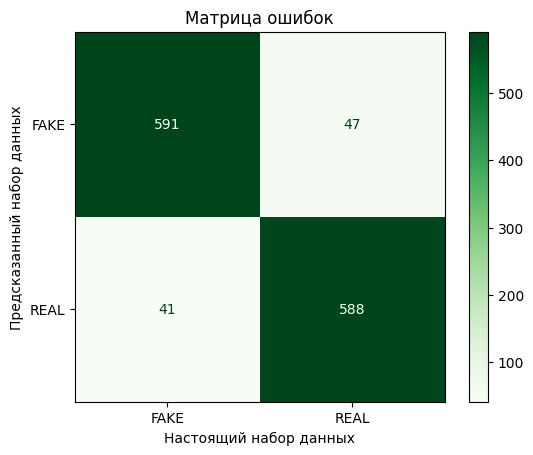

In [10]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pac.classes_)
disp.plot(cmap=plt.cm.Greens)
plt.title('Матрица ошибок')
plt.xlabel('Настоящий набор данных')
plt.ylabel('Предсказанный набор данных')
plt.show()